In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
%pip install seaborn

In [ ]:
%pip install openpyxl

In [5]:
dataset = pd.read_csv('../Datasets/diabetes_prediction_dataset.csv')
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
corr = dataset.select_dtypes(include='number').corr()
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [9]:
plt.figure(figsize=(20,20)) 
import seaborn as sns

<Figure size 2000x2000 with 0 Axes>

<Axes: >

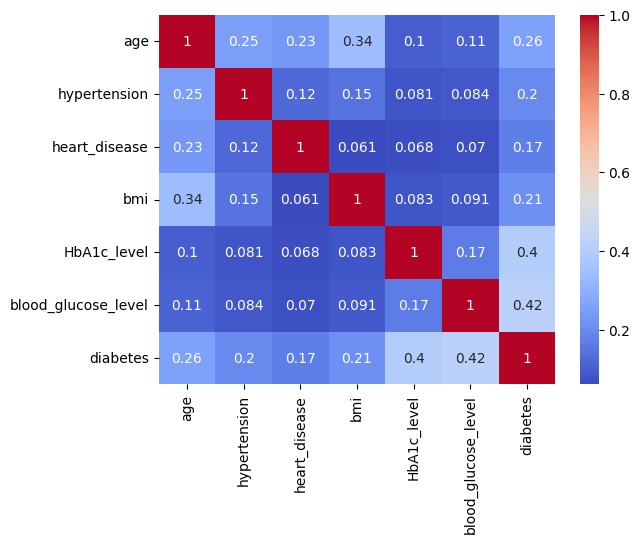

In [10]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [11]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [12]:
dataset['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [13]:
dataset['smoking_history'] = dataset['smoking_history'].replace({
    'current': 'smokes',
    'ever': 'smokes',
    'not current': 'Former smoker',
    'former': 'Former smoker',
    'never': 'Never smoked',
    'No Info': 'Never smoked'
})

In [14]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [15]:
dataset['age']

0        80.0
1        54.0
2        28.0
3        36.0
4        76.0
         ... 
99995    80.0
99996     2.0
99997    66.0
99998    24.0
99999    57.0
Name: age, Length: 100000, dtype: float64

In [16]:
# Create new columns based on age ranges
dataset["AgeCategory_0-9"] = (dataset["age"] >= 0) & (dataset["age"] <= 9)
dataset["AgeCategory_10-19"] = (dataset["age"] >= 10) & (dataset["age"] <= 19)
dataset["AgeCategory_20-24"] = (dataset["age"] >= 20) & (dataset["age"] <= 24)
dataset["AgeCategory_25-59"] = (dataset["age"] >= 25) & (dataset["age"] <= 59)
dataset["AgeCategory_60 or older"] = (dataset["age"] >= 60)

# Remove the original Age column
dataset.drop("age", axis=1, inplace=True)

In [17]:
dataset.columns

Index(['gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes', 'AgeCategory_0-9',
       'AgeCategory_10-19', 'AgeCategory_20-24', 'AgeCategory_25-59',
       'AgeCategory_60 or older'],
      dtype='object')

In [18]:
dataset.head()

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older
0,Female,0,1,Never smoked,25.19,6.6,140,0,False,False,False,False,True
1,Female,0,0,Never smoked,27.32,6.6,80,0,False,False,False,True,False
2,Male,0,0,Never smoked,27.32,5.7,158,0,False,False,False,True,False
3,Female,0,0,smokes,23.45,5.0,155,0,False,False,False,True,False
4,Male,1,1,smokes,20.14,4.8,155,0,False,False,False,False,True


In [19]:
dataset.replace({True:1, False:0}, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15552\2795904199.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({True:1, False:0}, inplace=True)


In [20]:
dataset.head()

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older
0,Female,0,1,Never smoked,25.19,6.6,140,0,0,0,0,0,1
1,Female,0,0,Never smoked,27.32,6.6,80,0,0,0,0,1,0
2,Male,0,0,Never smoked,27.32,5.7,158,0,0,0,0,1,0
3,Female,0,0,smokes,23.45,5.0,155,0,0,0,0,1,0
4,Male,1,1,smokes,20.14,4.8,155,0,0,0,0,0,1


In [21]:
dataset['smoking_history'].unique()

array(['Never smoked', 'smokes', 'Former smoker'], dtype=object)

In [22]:
# Create new columns based on SmokerStatus
dataset["Never smoked"] = (dataset["smoking_history"] == 'Never smoked')
dataset["smokes"] = (dataset["smoking_history"] == 'smokes')
dataset["Former smoker"] = (dataset["smoking_history"] == 'Former smoker')

# Remove the original SmokerStatus column
dataset.drop("smoking_history", axis=1, inplace=True)

In [23]:
dataset.replace({True:1, False:0}, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15552\2795904199.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({True:1, False:0}, inplace=True)


In [24]:
dataset.head()

,gender,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker
0,Female,0,1,25.19,6.6,140,0,0,0,0,0,1,1,0,0
1,Female,0,0,27.32,6.6,80,0,0,0,0,1,0,1,0,0
2,Male,0,0,27.32,5.7,158,0,0,0,0,1,0,1,0,0
3,Female,0,0,23.45,5.0,155,0,0,0,0,1,0,0,1,0
4,Male,1,1,20.14,4.8,155,0,0,0,0,0,1,0,1,0


In [25]:
dataset.dtypes

gender                      object
hypertension                 int64
heart_disease                int64
bmi                        float64
HbA1c_level                float64
blood_glucose_level          int64
diabetes                     int64
AgeCategory_0-9              int64
AgeCategory_10-19            int64
AgeCategory_20-24            int64
AgeCategory_25-59            int64
AgeCategory_60 or older      int64
Never smoked                 int64
smokes                       int64
Former smoker                int64
dtype: object

In [26]:
dataset['gender'] = (dataset['gender']=='Male')

In [27]:
dataset.head()

,gender,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker
0,False,0,1,25.19,6.6,140,0,0,0,0,0,1,1,0,0
1,False,0,0,27.32,6.6,80,0,0,0,0,1,0,1,0,0
2,True,0,0,27.32,5.7,158,0,0,0,0,1,0,1,0,0
3,False,0,0,23.45,5.0,155,0,0,0,0,1,0,0,1,0
4,True,1,1,20.14,4.8,155,0,0,0,0,0,1,0,1,0


In [28]:
dataset.replace({True:1, False:0}, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15552\2795904199.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({True:1, False:0}, inplace=True)


In [29]:
dataset.head()

,gender,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker
0,0,0,1,25.19,6.6,140,0,0,0,0,0,1,1,0,0
1,0,0,0,27.32,6.6,80,0,0,0,0,1,0,1,0,0
2,1,0,0,27.32,5.7,158,0,0,0,0,1,0,1,0,0
3,0,0,0,23.45,5.0,155,0,0,0,0,1,0,0,1,0
4,1,1,1,20.14,4.8,155,0,0,0,0,0,1,0,1,0


In [31]:
len(dataset)

100000

In [30]:
X = dataset.drop('diabetes', axis=1)
y = dataset['diabetes']

In [31]:
X.head()

,gender,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker
0,0,0,1,25.19,6.6,140,0,0,0,0,1,1,0,0
1,0,0,0,27.32,6.6,80,0,0,0,1,0,1,0,0
2,1,0,0,27.32,5.7,158,0,0,0,1,0,1,0,0
3,0,0,0,23.45,5.0,155,0,0,0,1,0,0,1,0
4,1,1,1,20.14,4.8,155,0,0,0,0,1,0,1,0


In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [ ]:
%pip install scikit-learn

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [38]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'Support Vector Machine': SVC(probability=True),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.959
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.61      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
[[18133   159]
 [  670  1038]]

Model: Random Forest
Accuracy: 0.968
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.90      0.71      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.94      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix:
[[18163   129]
 [  503  1205]]

Model: Gradient Boosting
Accuracy: 0.972
Classification Report:
              precision    recall  f1-score   support

 

In [35]:
# Best is given by the GradientBoostingClassifier, so will use it
model = GradientBoostingClassifier(
    n_estimators=200,            # Number of trees (more trees can capture complexity)
    learning_rate=0.05,          # Lower learning rate for gradual improvement
    max_depth=4,                 # Control tree depth to prevent overfitting
    min_samples_split=5,         # Minimum samples required to split
    min_samples_leaf=3,          # Minimum samples in a leaf node 
    random_state=42              # Ensures reproducibility
)

# Fit the model to training data
model.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.972
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.99      0.68      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix:
[[18280    12]
 [  545  1163]]


In [37]:
import pickle
with open('../pickle_files/diabetes_model_pickle.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")
for index in range(len(X_train)):
    if y_train.iloc[index] == 1:  # Check if the label is 1 (for diabetes)
        # Get the probability of the instance being in class 1 (diabetes)
        probability = model.predict_proba([X_train.iloc[index]])[0][1]  # Probability for class 1
        
        
        # Print the feature values, actual label, predicted label, and probability
        print(f"Index: {index}")
        print(f"Features: \n{X_train.iloc[index]}")
        print(f"Actual Label: {y_train.iloc[index]}")
        print(f"Predicted Label: {model.predict([X_train.iloc[index]])[0]}")
        print(f"Probability of Disease: {probability:.4f}")  # Printing the probability with 4 decimal places
        print("-" * 40)  # Print a separator for clarity


Index: 1
Features: 
gender                       1.0
hypertension                 0.0
heart_disease                0.0
bmi                         24.6
HbA1c_level                  5.7
blood_glucose_level        145.0
AgeCategory_0-9              0.0
AgeCategory_10-19            0.0
AgeCategory_20-24            0.0
AgeCategory_25-59            0.0
AgeCategory_60 or older      1.0
Never smoked                 1.0
smokes                       0.0
Former smoker                0.0
Name: 48955, dtype: float64
Actual Label: 1
Predicted Label: 0
Probability of Disease: 0.0291
----------------------------------------
Index: 7
Features: 
gender                       1.00
hypertension                 0.00
heart_disease                0.00
bmi                         27.32
HbA1c_level                  7.00
blood_glucose_level        130.00
AgeCategory_0-9              0.00
AgeCategory_10-19            0.00
AgeCategory_20-24            0.00
AgeCategory_25-59            1.00
AgeCategory_60 or older

KeyboardInterrupt: 